# Perceptron based Weak Classifier

In [4]:
import pickle
import numpy as np
import pdb
import matplotlib.pyplot as plt
with open("train_test_split.pkl", "br") as fh:
    data = pickle.load(fh)
train_data = data[0]
test_data = data[1]

train_x = train_data[:,:23]
train_y = train_data[:,23] # labels are either 0 or 1
test_x = test_data[:,:23]
test_y = test_data[:,23] # labels are either 0 or 1
train_y = 2*train_y - 1
test_y = 2*test_y -1

In [3]:
train_y = 2*train_y - 1
test_y = 2*test_y -1

In [17]:
# @title  Implementation of perceptron Algorithm
def perceptron_algo(X:np.asarray,y:np.asarray,max_pass:int=500, w:np.asarray=np.zeros((1,1)),b:np.float32=0):
  mistakes = np.zeros((0)) # to record the mistakes in each iteration
  num_features = 1
  num_training_example = X.shape[1]
  for j in range(max_pass):
    mistake_t = 0
    for i in range(num_training_example):
      pdb.set_trace()
      if(y[i]*(X[:,i][...,np.newaxis].T@w+b).squeeze() <= 0) :
       
        w = w + y[i]*X[:,i][...,np.newaxis]
        b = b + y[i]
        mistake_t+=1
    mistakes = np.hstack((mistakes,np.asarray([mistake_t])))
    #print(f"mistake-at-{j}",mistake_t)
  return w,b,mistakes

In [18]:
# @title Calling Perceptron Algorithm
X = train_x
y = train_y
max_pass_itr = 500
num_of_features = train_x.shape[1]
w = []
b = []
mistakes = []
for i in range(num_of_features):
    w_i,b_i,mistakes_i = perceptron_algo(X[:,i][...,np.newaxis],y,max_pass=max_pass_itr, w=np.zeros((1,1)),b=0)
    w.append[w_i]
    b.append[b_i]
    mistakes.append[mistakes_i]

> /tmp/ipykernel_9990/1208895865.py(10)perceptron_algo()
      8     for i in range(num_training_example):
      9       pdb.set_trace()
---> 10       if(y[i]*(X[:,i][...,np.newaxis].T@w+b).squeeze() <= 0) :
     11 
     12         w = w + y[i]*X[:,i][...,np.newaxis]



In [ ]:
# @title Plots
plt.title("Spam-Database Perceptron")
plt.xlabel("iteration")
plt.ylabel("number-of-mistakes")
plt.savefig('a1q1.png', bbox_inches='tight')
plt.plot(np.arange(500),mistakes)

# Stumps Implementation

In [ ]:
def stump(X:np.asarray,y:np.asarray, w_j:np.asarray=0,b_j:np.float32=0):
    # stump classification is essentialy [[x >=k ]] , which is same as saying [[  wx+b>=0  ]]
    #X is 1d array of nx1 : n is no of training example
    # y is classification label
    
    
    
    
    return w_j , b_j

# Using SKLEARN

In [45]:
from sklearn import tree
X_j = train_x[:,11][...,np.newaxis].astype(np.float32)
Y = train_y[...,np.newaxis].astype(np.int32)
clf0 = tree.DecisionTreeClassifier(max_depth=1)
clf0 = clf0.fit(X_j,Y )


[Text(0.5, 0.75, 'x[0] <= 54981.5\ngini = 0.341\nsamples = 20000\nvalue = [15637, 4363]'),
 Text(0.25, 0.25, 'gini = 0.351\nsamples = 14227\nvalue = [10995, 3232]'),
 Text(0.75, 0.25, 'gini = 0.315\nsamples = 5773\nvalue = [4642, 1131]')]

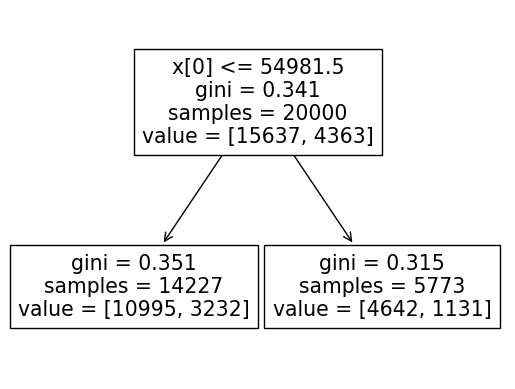

In [46]:
tree.plot_tree(clf0)

In [50]:
clf0.predict(np.asarray([549811.0]))

ValueError: Expected 2D array, got 1D array instead:
array=[549811.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [78]:
class DecisionNode:
    def __init__(self,split): # split chosen from x values
        self.split = split
    def predict(self,x):
        if x < self.split:
            return self.left.predict(x)
        return self.right.predict(x)

class LeafNode:
    def __init__(self,y,left=None,right=None):
        self.y = y
    def predict_test(self, x): # Predictions are the means of subregions (x ignored in leaf)
        return np.mean(self.y) 

find_best_split in x=[1.0, 2.0, 3.0, 4.0, 5.0]
[1] | [2 3 4 5]    candidate split x =2.000000 loss      2.5
[1 2] | [3 4 5]    candidate split x =3.000000 loss      1.2
[1 2 3] | [4 5]    candidate split x =4.000000 loss      1.2
[1 2 3 4] | [5]    candidate split x =5.000000 loss      2.5
> /tmp/ipykernel_9990/909491610.py(34)fit()
     32         root = Node(split)
     33         pdb.set_trace()
---> 34         root.left = LeafNode(y[x<split])
     35         root.right = LeafNode(y[x>=split])
     36         return root



In [66]:
root = DecisionNode(900)                 # split on x at 900
root.left = LeafNode([1160, 1200, 1280]) # 3 y values in leaf
root.right = LeafNode([1450,2000])

x = 900
y_pred = root.predict(x)
print(f"{x} => {y_pred:.1f} (avg [1450,2000] is {np.mean([1450,2000])})")

x = 890
y_pred = root.predict(x)
print(f"{x} => {y_pred:.1f} (avg [1450,2000] is {np.mean([1450,2000])})")

900 => 1725.0 (avg [1450,2000] is 1725.0)
890 => 1213.3 (avg [1450,2000] is 1725.0)


In [80]:
y_pred = model.predict_test(2000)

AttributeError: 'stump' object has no attribute 'y'

In [63]:
train_x[0,0]

20000

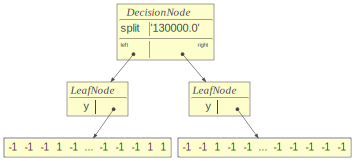

In [55]:
from lolviz import *
treeviz(t)

In [85]:
import numpy as np
import pandas as pd

df = pd.DataFrame()

class DecisionNode:
    def __init__(self, split):  # split chosen from x values
        self.split = split
        self.left = None
        self.right = None

    def predict(self, x):
        if x < self.split:
            return self.left.predict_test(x)
        return self.right.predict_test(x)

class LeafNode:
    def __init__(self, y):
        self.y = y

    def predict_test(self, x):  # Predictions are the means of subregions (x ignored in leaf)
        return np.mean(self.y)

class Stump:
    def __init__(self):
        self.root = None

    def fit(self, x, y):
        """
        We train on the (x,y), getting split of single-var x that
        minimizes variance in subregions of y created by x split.
        Return root of decision tree stump.
        """
        loss, split = self.find_best_split(x, y)
        root = DecisionNode(split)
        root.left = LeafNode(y[x < split])
        root.right = LeafNode(y[x >= split])
        self.root = root
        return root

    def find_best_split(self, x, y):
        best_loss = np.inf
        best_split = -1
        print(f"find_best_split in x={list(x)}")
        for v in x[1:]:  # try all possible x values
            lefty = y[x < v]
            righty = y[x >= v]
            nl = len(lefty)
            nr = len(righty)
            if nl == 0 or nr == 0:
                continue
            # variance is same as MSE here
            # weight by proportion on left and right, get avg as loss
            loss = (np.var(lefty) * nl + np.var(righty) * nr) / (nl + nr)
            print(f"{lefty} | {righty}    candidate split x ={v:.4f} loss {loss:.8f}")
            if loss < best_loss:
                best_loss = loss
                best_split = v
        return float(best_loss), best_split

    def fit_all_features(self, X, Y):
        results = []
        for i in range(X.shape[1]):
            df["x"] = X[:, i].astype(np.float32)
            df["y"] = Y.astype(np.int32)
            t = self.fit(df["x"], df["y"])
            results.append(t)
        return results

    def predict(self, x):
        if self.root:
            return self.root.predict(x)
        else:
            raise Exception("Model is not trained yet.")

# Example usage:
df["y"] = train_y.astype(np.int32).tolist()
df["x"] = train_x[:,0].astype(np.float32).tolist()
# train_x = np.array([[1], [2], [3], [4], [5]])
# train_y = np.array([1, 2, 3, 4, 5])

# model = Stump()
# df["y"] = train_y.astype(np.int32)
# df["x"] = train_x[:, 0].astype(np.float32)
t = model.fit(df["x"], df["y"])

# Predicting new values
test_x = np.array([20000])
predictions = [model.predict(x) for x in test_x]

print("Predictions for test_x:", test_x)
print("Predicted values:", predictions)


find_best_split in x=[1.0, 2.0, 3.0, 4.0, 5.0]
0    1
Name: y, dtype: int64 | 1    2
2    3
3    4
4    5
Name: y, dtype: int64    candidate split x =2.0000 loss 1.00000000
0    1
1    2
Name: y, dtype: int64 | 2    3
3    4
4    5
Name: y, dtype: int64    candidate split x =3.0000 loss 0.50000000
0    1
1    2
2    3
Name: y, dtype: int64 | 3    4
4    5
Name: y, dtype: int64    candidate split x =4.0000 loss 0.50000000
0    1
1    2
2    3
3    4
Name: y, dtype: int64 | 4    5
Name: y, dtype: int64    candidate split x =5.0000 loss 1.00000000
Predictions for test_x: [20000]
Predicted values: [4.0]


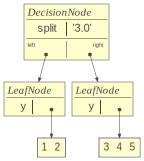

In [86]:
treeviz(t)